<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Take-stock-data" data-toc-modified-id="Take-stock-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Take stock data</a></span></li><li><span><a href="#Check-If-Data-Shows-Property-of-a-White-Noise" data-toc-modified-id="Check-If-Data-Shows-Property-of-a-White-Noise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check If Data Shows Property of a White Noise</a></span></li><li><span><a href="#Check-if-Data-Shows-Property-of-a-Random-Walk" data-toc-modified-id="Check-if-Data-Shows-Property-of-a-Random-Walk-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check if Data Shows Property of a Random Walk</a></span></li><li><span><a href="#Check-if-Data-Shows-Property-of-Stationarity" data-toc-modified-id="Check-if-Data-Shows-Property-of-Stationarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check if Data Shows Property of Stationarity</a></span><ul class="toc-item"><li><span><a href="#Making-Non-Stationary-Data-Stationarity" data-toc-modified-id="Making-Non-Stationary-Data-Stationarity-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Making Non Stationary Data Stationarity</a></span></li><li><span><a href="#Using-Difference/Return-of-Close" data-toc-modified-id="Using-Difference/Return-of-Close-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using Difference/Return of Close</a></span></li></ul></li><li><span><a href="#Check-if-there-is-Seasonality-in-Data" data-toc-modified-id="Check-if-there-is-Seasonality-in-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check if there is Seasonality in Data</a></span></li><li><span><a href="#Yearwise-Average-Closing-Price" data-toc-modified-id="Yearwise-Average-Closing-Price-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Yearwise Average Closing Price</a></span></li><li><span><a href="#MonthWise-Average-Closing-Price" data-toc-modified-id="MonthWise-Average-Closing-Price-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MonthWise Average Closing Price</a></span></li><li><span><a href="#Weekly-Average-Closing-Price" data-toc-modified-id="Weekly-Average-Closing-Price-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Weekly Average Closing Price</a></span></li><li><span><a href="#Variance-Per-Year/Month/Week" data-toc-modified-id="Variance-Per-Year/Month/Week-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Variance Per Year/Month/Week</a></span></li><li><span><a href="#Average-Closing-Price-Per-Year/Month" data-toc-modified-id="Average-Closing-Price-Per-Year/Month-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Average Closing Price Per Year/Month</a></span></li><li><span><a href="#Average-Closing-Price-Per-Day-Per-Month" data-toc-modified-id="Average-Closing-Price-Per-Day-Per-Month-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Average Closing Price Per Day Per Month</a></span></li><li><span><a href="#Modeling:-Monthly-Prediction" data-toc-modified-id="Modeling:-Monthly-Prediction-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Modeling: Monthly Prediction</a></span><ul class="toc-item"><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>ARIMA</a></span></li><li><span><a href="#Auto-SARIMA" data-toc-modified-id="Auto-SARIMA-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Auto SARIMA</a></span></li><li><span><a href="#Modeling-with-Train/Test" data-toc-modified-id="Modeling-with-Train/Test-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Modeling with Train/Test</a></span></li></ul></li><li><span><a href="#Modeling:-Weekly-Prediction" data-toc-modified-id="Modeling:-Weekly-Prediction-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Modeling: Weekly Prediction</a></span></li><li><span><a href="#Train-as-2002-Feb-1-to-2017-Jan-31-and-Test-as-Feb-1-2017-until-Jan-31-2018" data-toc-modified-id="Train-as-2002-Feb-1-to-2017-Jan-31-and-Test-as-Feb-1-2017-until-Jan-31-2018-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Train as 2002-Feb-1 to 2017-Jan-31 and Test as Feb 1 2017 until Jan 31 2018</a></span><ul class="toc-item"><li><span><a href="#Auto-ARIMA" data-toc-modified-id="Auto-ARIMA-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Auto ARIMA</a></span></li></ul></li></ul></div>

## Imports

Before running importing codes, make sure you have installed plotly, cufflinks and yahoo finance

In [1]:
# !pip install plotly cufflinks yfinance


In [2]:
import pandas as pd
import plotly.express as px
import cufflinks
import plotly.io as pio 
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
warnings.filterwarnings("ignore")
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
pio.renderers.default = "notebook" # should change by looking into pio.renderers
sns.set(rc={'figure.figsize':(40, 20)})
plt.rc("figure", figsize=(16,8))
pd.options.display.max_columns = None

## Take stock data
We will be taking a look into Apple's stock price, whose symbol is `AAPL`. Lets take data from 2010 only.

In [3]:
symbols = ["AAPL"]

df = yf.download(tickers=symbols,start="2002-02-01", end="2017-01-31")
df.columns = [c.lower() for c in df.columns]
df.rename(columns={"adj close":"adj_close"},inplace=True)
df.head()

NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2002-01-31,0.431429,0.441607,0.430536,0.441429,0.377984,468445600
2002-02-01,0.434643,0.445714,0.434643,0.435893,0.373244,398305600
2002-02-04,0.434286,0.455714,0.432143,0.452679,0.387617,522373600
2002-02-05,0.448036,0.463929,0.447857,0.454464,0.389146,456887200
2002-02-06,0.457143,0.463929,0.431250,0.440536,0.377219,597576000


## Check If Data Shows Property of a White Noise
In layman's term, a white noise time series is a sequence of uncorrelated random variables that are identically distributed. In Stock market, returns are often modeled as white noise. Thus, using white noise, we can not forecast future values based on the past since auto correlations at all lags are zeros. 

* ACF (Auto-Correlation Function) can be used to see if a series resembles white noise or not. Little the ACF, more the white noise.
* PACF is just like ACF except that it gives the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations. Taken from [statisticsbyjim](https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/).

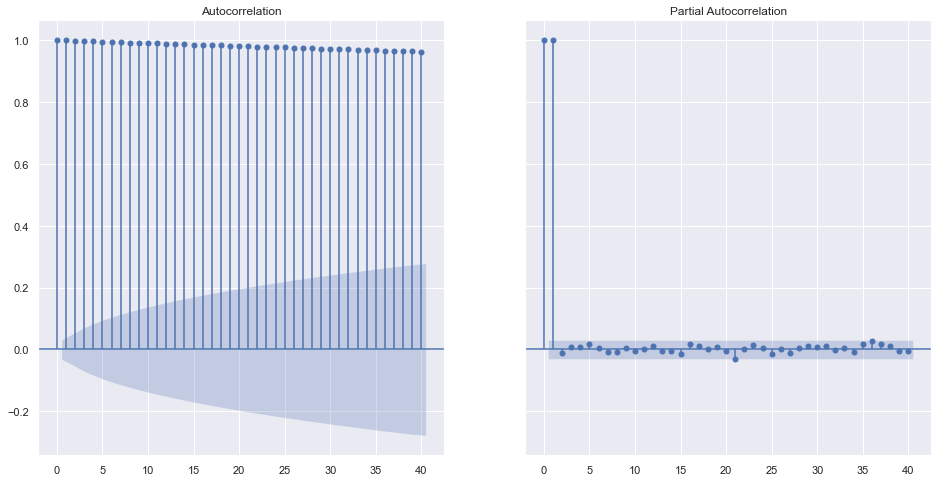

In [4]:
fig, ax = plt.subplots(1,2, sharey=True)
plot_acf(df.adj_close, lags=40, ax=ax[0])
plot_pacf(df.adj_close, lags=40, ax=ax[1])
plt.show()

Data does not shows white noise.

## Check if Data Shows Property of a Random Walk
It is simply a random change from the previous period. In other word, today's price is yesterday's price + some random value. Augmented Dicky Fuller Test (ADF) is done to test whether data shows a property of random walk. We can not forecast random walk. In ADF test, if p-value is smaller than our significance level (normally 0.05) then we can reject the null hypothesis (Data is a random walk.)

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf(data):
    results = adfuller(data)
    print(f"ADF Statistic: {results[0]}")
    print(f"p-value: {results[1]}")
    print("Critical Values:")
    for key, value in results[4].items():
        print("\t%s: %.3f" % (key, value))
    if results[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is not a random walk.")
    else:
        print("Weak evidence against null hypothesis, indicating data is a random walk.")
    

In [6]:
adf(df.adj_close)

ADF Statistic: 0.3151850813945904
p-value: 0.9780305424500773
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Weak evidence against null hypothesis, indicating data is a random walk.


## Check if Data Shows Property of Stationarity
Stationarity is the property where ACF is very little in data. Again, we use ADF test. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary. Will check it later in breif.

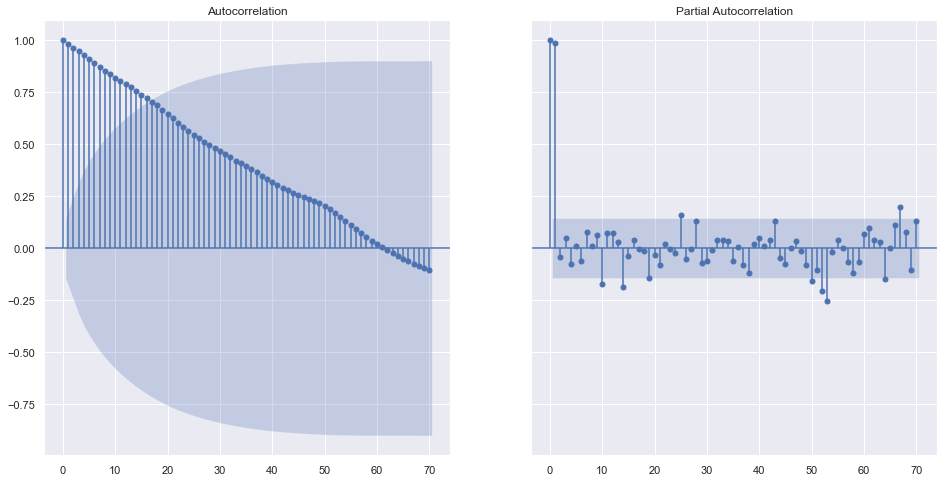

In [7]:
# taking monthly data
df=df.reset_index()
mdf = df.groupby(pd.Grouper(key="Date", freq="1M")).adj_close.mean().reset_index()

fig, ax = plt.subplots(1,2, sharey=True)
plot_acf(mdf.adj_close, lags=70, ax=ax[0])
plot_pacf(mdf.adj_close, lags=70, ax=ax[1])
plt.show()



Looking over above plots,
* From ACF, we can take order of MA term as 1 because from the first order, the auto-correlation started to degrade quickly. 
* From PACF, we can take order of AR term as 1 because from first order, the auto correlation started to degrade massively.
* Looking over above both plots, the data is not stationary. Which means that we can not predict it.



### Making Non Stationary Data Stationarity

### Using Difference/Return of Close

In [8]:
# difference of value with lag 1 is diff
adf(df.adj_close.diff()[1:])


ADF Statistic: -11.15566364928704
p-value: 2.8702225169802735e-20
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is not a random walk.


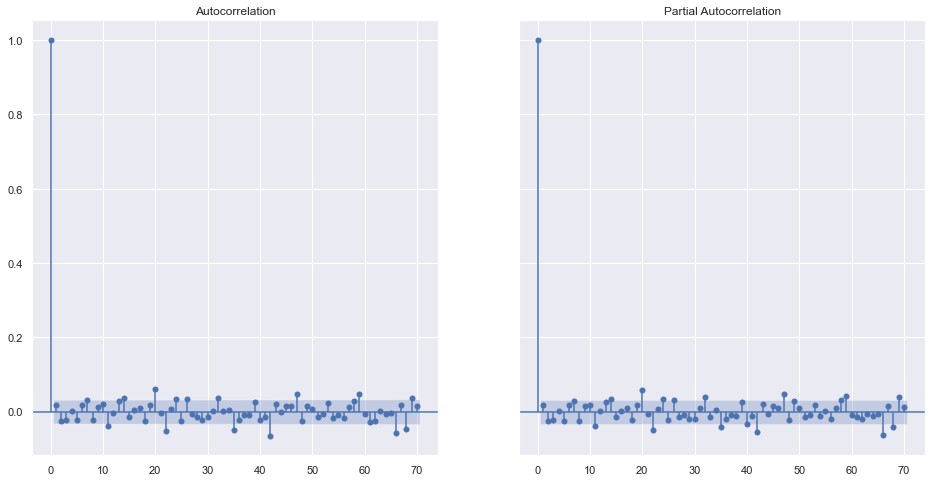

In [9]:
# taking monthly data
df.adj_close.diff()[1:]

fig, ax = plt.subplots(1,2, sharey=True)
plot_acf(df.adj_close.diff()[1:], lags=70, ax=ax[0])
plot_pacf(df.adj_close.diff()[1:], lags=70, ax=ax[1])
plt.show()



As seen on the above plot, if we took one lag, we can get nearly stationary value.

## Check if there is Seasonality in Data

In seasonality, whether there are the trends of repeating cycle on the data. We can often decompose seasonality into trend, seasonal effect and residual.

Decompose data into:-
* **Trend**: Pattern in data.
* **Seasonal**: Cyclic pattern in the data.
* **Residual**: Error of prediction.

A seasonality can be either additive or multiplicative or unknown.

Naive decomposition:
* Additive: trend + seasonal + residual
* Multiplicative: trend * seasonal * residual

Lets check the seasonality in monthly basis.

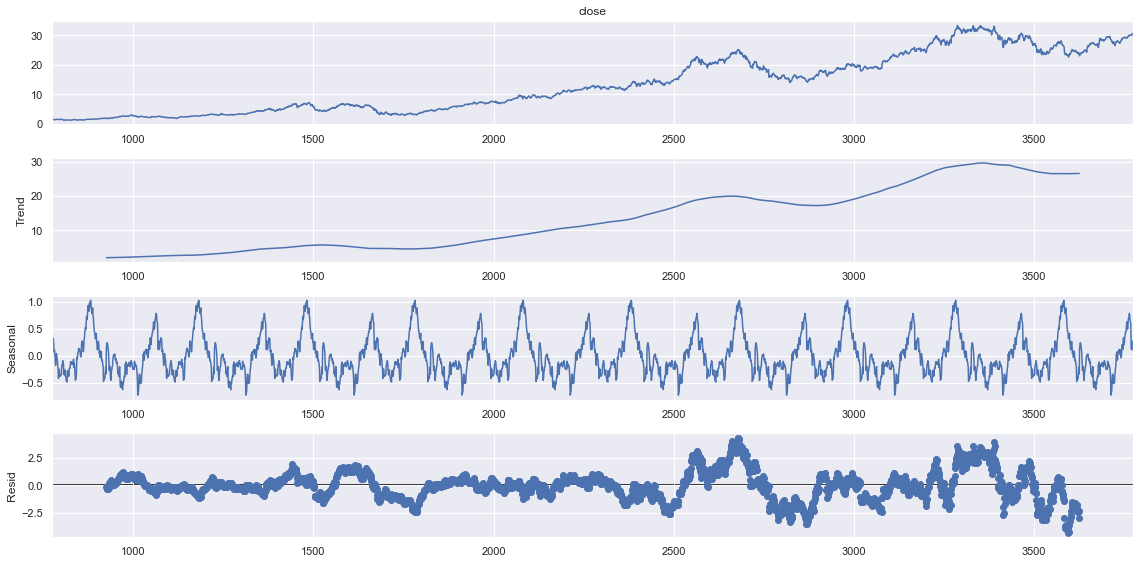

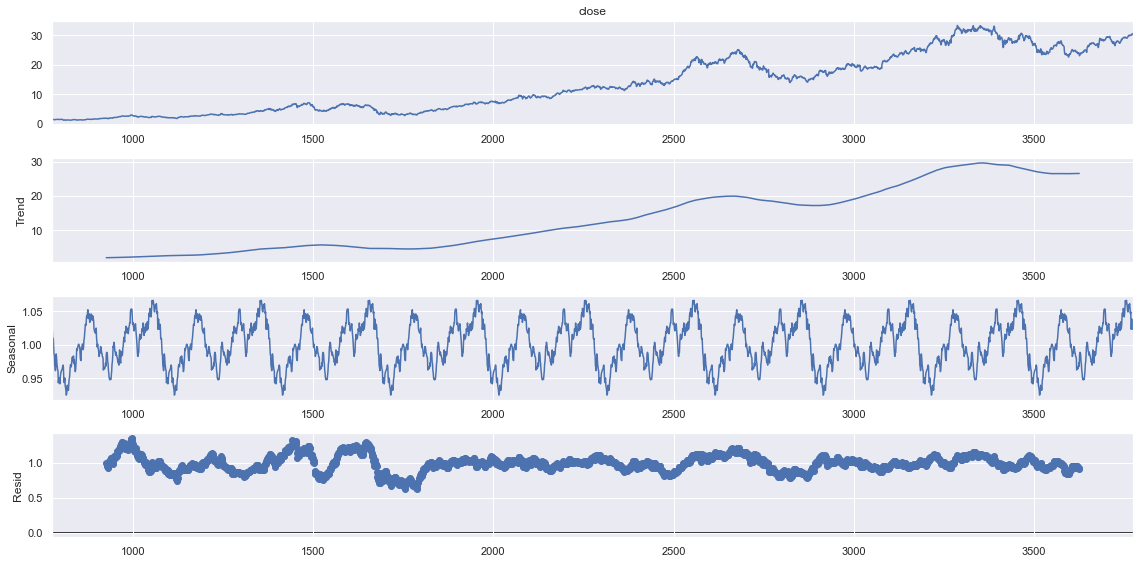

In [10]:
# check for last 3000 days data
from statsmodels.tsa.seasonal import seasonal_decompose
sdec = seasonal_decompose(df.close[-3000:], model="additive", period=300)
sdec.plot()
plt.show()

sdec = seasonal_decompose(df.close[-3000:], model="multiplicative", period=300)
sdec.plot()
plt.show()


It seems that there are very narrow residuals in Multiplicative model whereas, the residuals seems to be spreaded a lot in additive. We can make some assumptions that our trend follows multiplicative seasonality.

## Yearwise Average Closing Price

<AxesSubplot:title={'center':'Yearly'}, xlabel='Date'>

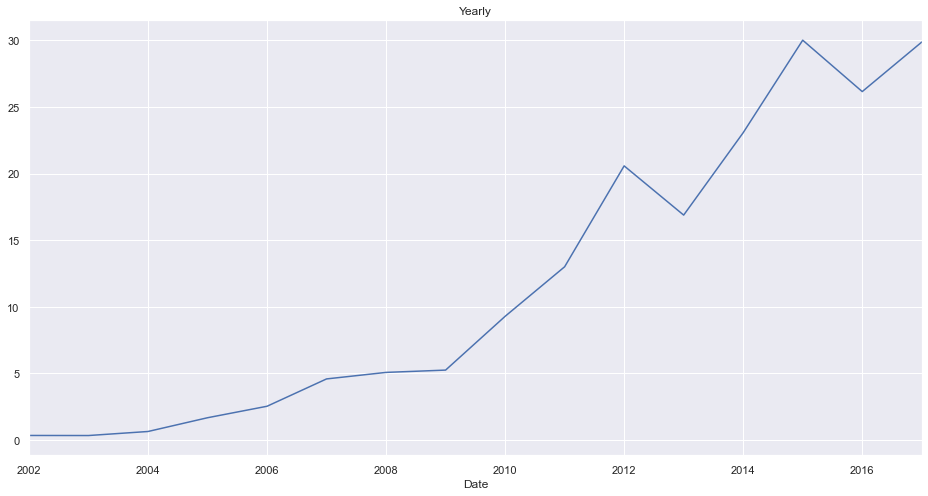

In [11]:
ndf = df.copy().reset_index()
ndf.groupby(pd.Grouper(key="Date", freq="1Y")).close.mean().plot(kind="line", title="Yearly")

It seems that the average closing price is increasing each year.

## MonthWise Average Closing Price

<AxesSubplot:title={'center':'Monthly'}, xlabel='Date'>

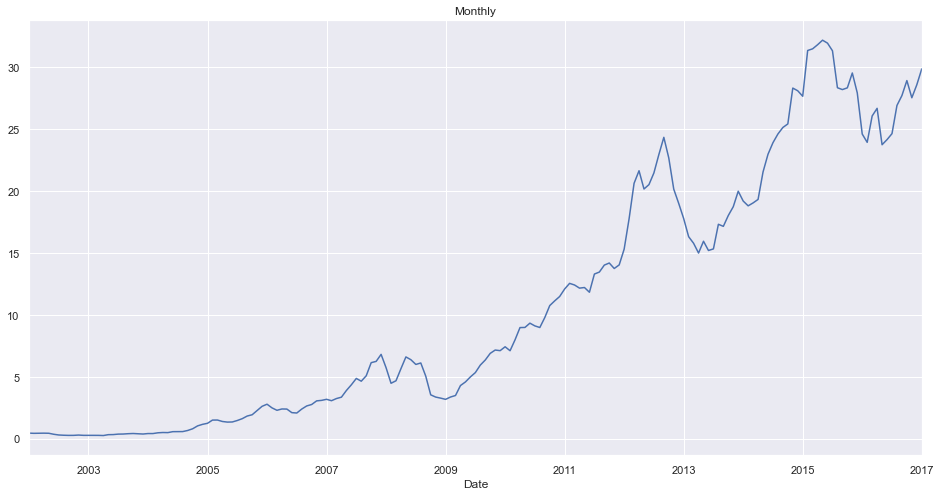

In [12]:
ndf.groupby(pd.Grouper(key="Date", freq="1M")).close.mean().plot(kind="line", title="Monthly")

It seems that, the average closing price in each month is increasing in long term but not in the short term.

## Weekly Average Closing Price



<AxesSubplot:title={'center':'Weekly'}, xlabel='Date'>

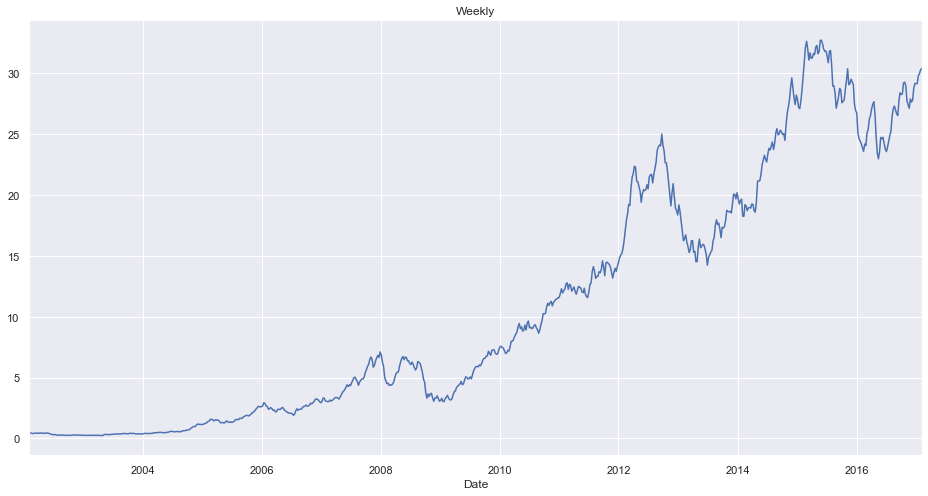

In [13]:
ndf.groupby(pd.Grouper(key="Date", freq="1W")).close.mean().plot(kind="line", title="Weekly")

Just like, of Monthly. 

<AxesSubplot:title={'center':'6Monthly'}, xlabel='Date'>

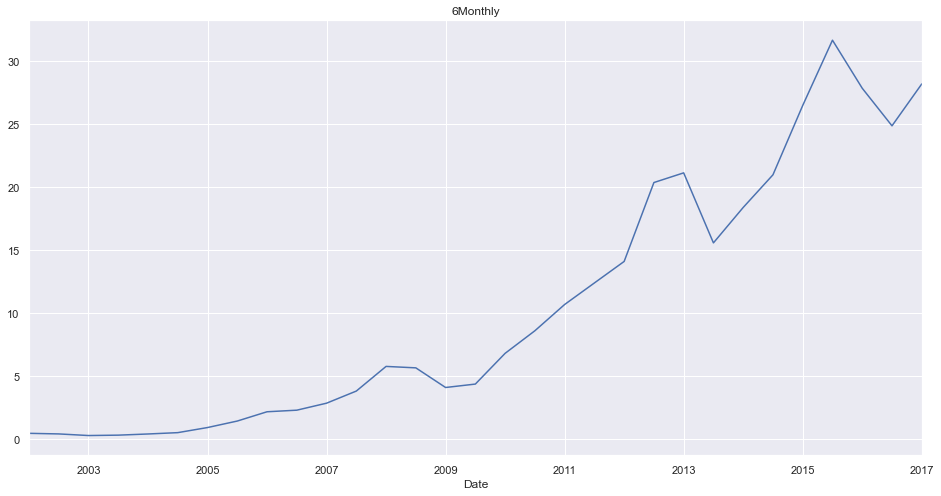

In [14]:
ndf.groupby(pd.Grouper(key="Date", freq="6M")).close.mean().plot(kind="line", title="6Monthly")

## Variance Per Year/Month/Week

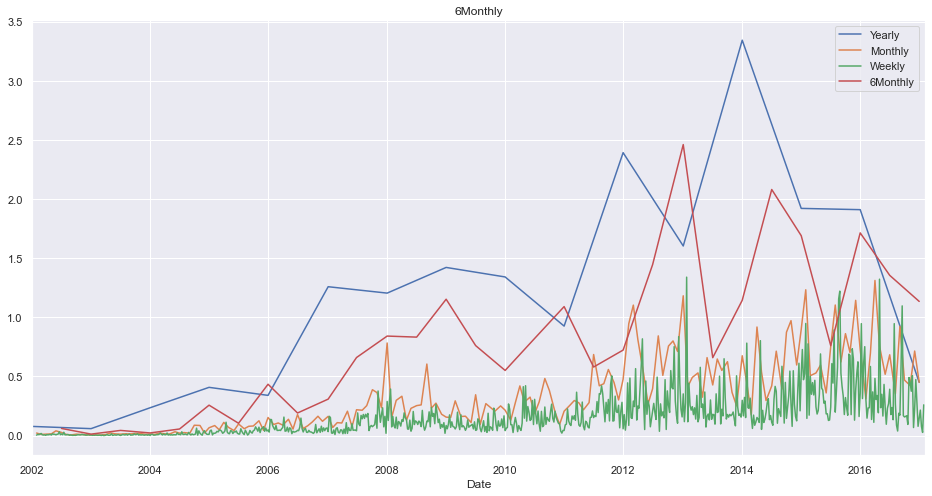

In [15]:
ndf.groupby(pd.Grouper(key="Date", freq="1Y")).close.std().plot(kind="line", title="Yearly")
ndf.groupby(pd.Grouper(key="Date", freq="1M")).close.std().plot(kind="line", title="Monthly")
ndf.groupby(pd.Grouper(key="Date", freq="1W")).close.std().plot(kind="line", title="Weekly")
ndf.groupby(pd.Grouper(key="Date", freq="6M")).close.std().plot(kind="line", title="6Monthly")
plt.legend(["Yearly", "Monthly", "Weekly", "6Monthly"])
plt.show()

## Average Closing Price Per Year/Month

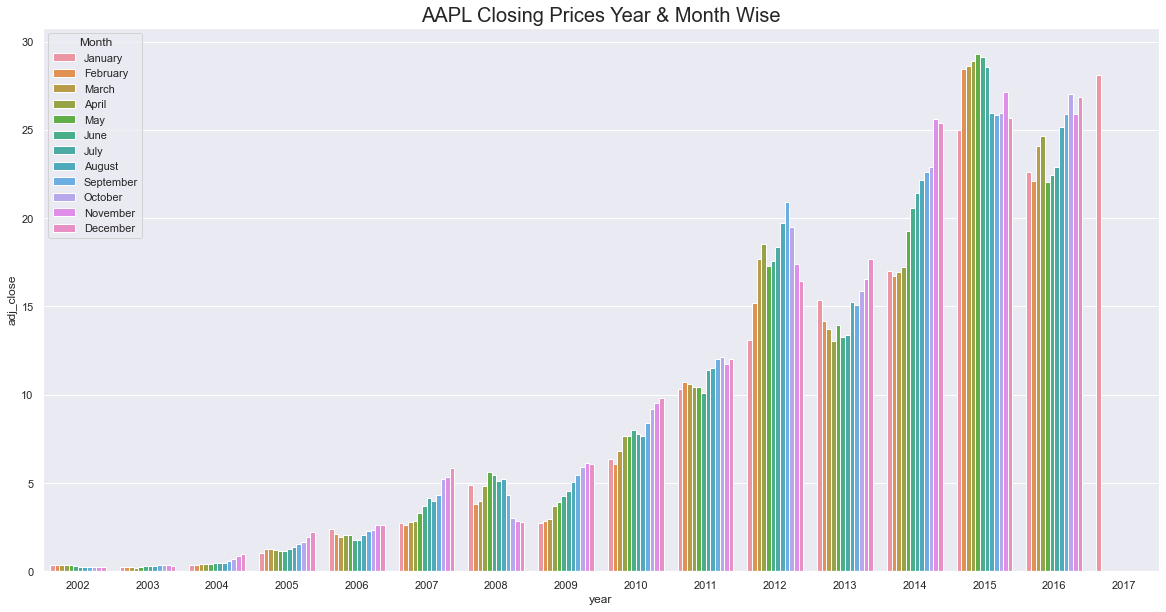

In [16]:
import plotly.graph_objects as go

mdf = ndf.groupby([pd.Grouper(key="Date", freq="1M")]).adj_close.mean().reset_index()
mdf["month"] = mdf.Date.dt.strftime('%B')
mdf["day"] = mdf.Date.dt.strftime('%A')
mdf["year"] = mdf.Date.dt.year


fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("vlag", 4)
a = sns.barplot(x="year", y="adj_close",hue = 'month',data=mdf)
a.set_title("AAPL Closing Prices Year & Month Wise",fontsize=20)
plt.legend(loc='upper left',title="Month")
plt.show()

## Average Closing Price Per Day Per Month

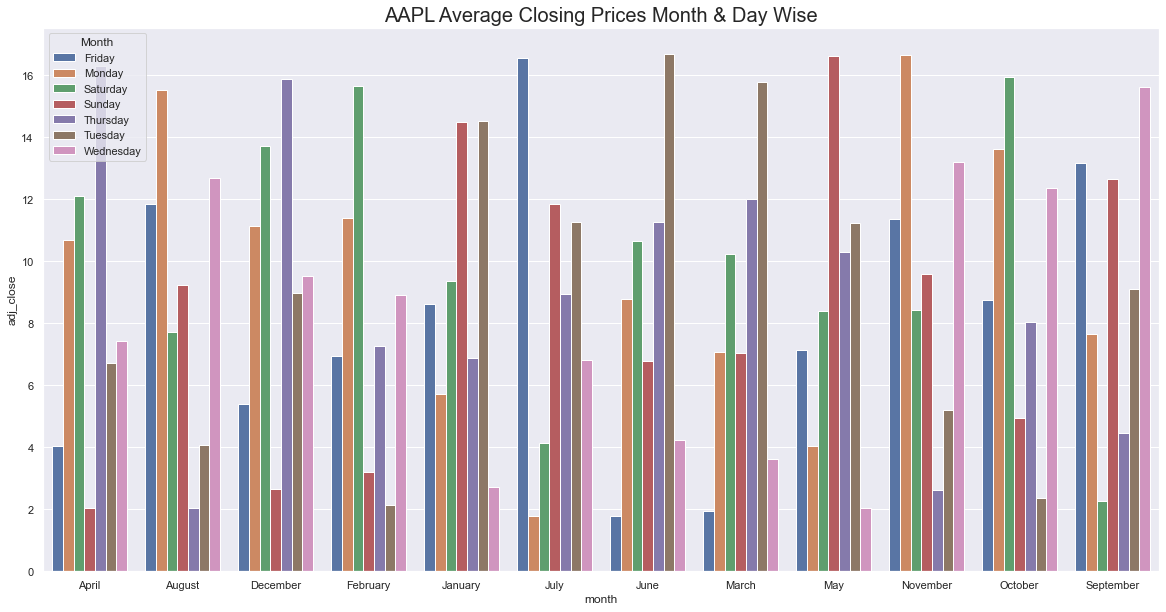

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("vlag", 4)
a = sns.barplot(x="month", y="adj_close",hue = 'day',data=mdf.groupby(["month", "day"]).adj_close.mean().reset_index())
a.set_title("AAPL Average Closing Prices Month & Day Wise",fontsize=20)
plt.legend(loc='upper left',title="Month")
plt.show()

Certain spikes can be seen in end month and on Monday.

## Modeling: Monthly Prediction
Before going further into modeling, lets define a function to calculate
* percentage change error. 
* Mean Squared Error.


In [18]:
def percentage_change(forecast, actual, threshold=10):
    pchange = 100*(forecast-actual)/actual
    acc = (pchange.abs()<threshold).sum()/len(pchange)
    return acc

def mean_squared(forecast, actual):
    return np.mean((forecast - actual)**2)

Lets try find best orders of AR, I and MA by grid search.

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mdf, test_size=0.1, shuffle=False)
train

,Date,adj_close,month,day,year
0,2002-01-31,0.377984,January,Thursday,2002
1,2002-02-28,0.364190,February,Thursday,2002
2,2002-03-31,0.370683,March,Sunday,2002
3,2002-04-30,0.375530,April,Tuesday,2002
4,2002-05-31,0.368740,May,Friday,2002
...,...,...,...,...,...
157,2015-02-28,28.449606,February,Saturday,2015
158,2015-03-31,28.588640,March,Tuesday,2015
159,2015-04-30,28.888328,April,Thursday,2015
160,2015-05-31,29.319917,May,Sunday,2015


### ARIMA
From PACF and ACF plots above (look for making non stationary data stationary too), order of (1,1,1) is best for ARIMA.

<AxesSubplot:xlabel='Date'>

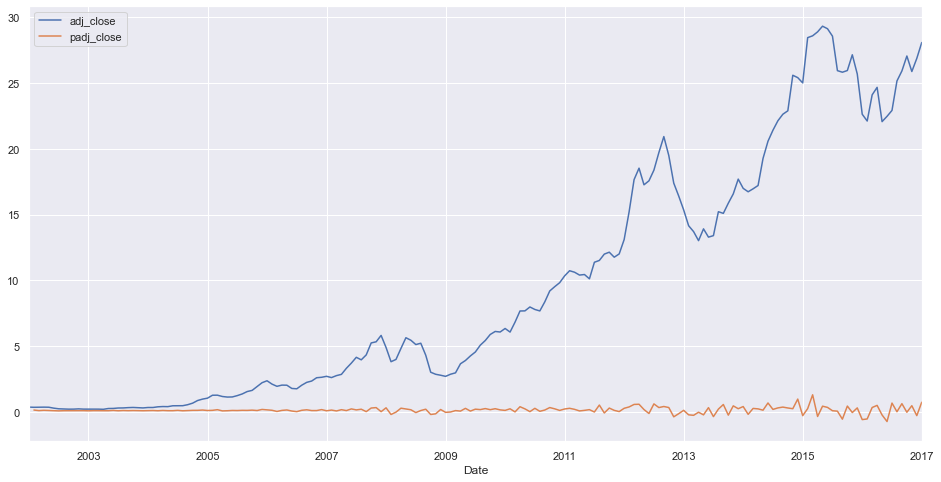

In [20]:
from statsmodels.tsa.arima_model import ARIMA

tmdf = mdf.copy()
model=ARIMA(tmdf.adj_close, order=(3,1,1))
model_fit=model.fit()

# print(model_fit.summary())

fitted = model_fit.predict(start=1, end=len(tmdf))


tmdf["padj_close"] = fitted

tmdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date")

Looking over the plot above, the model is not performing well. May be there is some seasonal trend that we are missing. Lets fit a seasonal model.

### Auto SARIMA
We know the best order of ARIMA but lets find the P,D,Q and M for SARIMA. Where, P is for Seasonal AR, Q for Seasonal MA, D for Seasonal difference and M for length of season.

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

order = (1, 1, 1)
sorder = (0, 1, 0, 2)

best_aic = np.inf
best_mdl = None
ms=[12]
best_order = None
best_sorder = None

for P in range(3):
    for Q in range(3):
        for D in range(3):
            for m in ms:
                try:
#                     order = (p, d, q)
                    sorder = (P, D, Q, m)
                    # define a model
                    smodel = SARIMAX(mdf.adj_close, order=order, seasonal_order=sorder)
                    smodel = smodel.fit()
                    print(f"Order: {order}, Sorder: {sorder}, AIC: {smodel.aic}")
                    if smodel.aic<best_aic:
                        best_aic = smodel.aic
                        best_mdl = smodel
                        best_order = order
                        best_sorder = sorder
                except Exception as e:
                    print(e)
#                 continue

print(f"Best Order: {best_order} Best SOrder: {best_sorder}")

Order: (1, 1, 1), Sorder: (0, 0, 0, 12), AIC: 428.9279354350148
Order: (1, 1, 1), Sorder: (0, 1, 0, 12), AIC: 527.8285112303627
Order: (1, 1, 1), Sorder: (0, 2, 0, 12), AIC: 629.0493225320075
Order: (1, 1, 1), Sorder: (0, 0, 1, 12), AIC: 426.65369440503065
Order: (1, 1, 1), Sorder: (0, 1, 1, 12), AIC: 438.5285593477955
Order: (1, 1, 1), Sorder: (0, 2, 1, 12), AIC: 534.5173600130856
Order: (1, 1, 1), Sorder: (0, 0, 2, 12), AIC: 423.06863073214737
Order: (1, 1, 1), Sorder: (0, 1, 2, 12), AIC: 436.7752439911005
Order: (1, 1, 1), Sorder: (0, 2, 2, 12), AIC: 478.75446847058913
Order: (1, 1, 1), Sorder: (1, 0, 0, 12), AIC: 428.32586800064325
Order: (1, 1, 1), Sorder: (1, 1, 0, 12), AIC: 498.24004899807153
Order: (1, 1, 1), Sorder: (1, 2, 0, 12), AIC: 584.2718116045997
Order: (1, 1, 1), Sorder: (1, 0, 1, 12), AIC: 426.51719199634
Order: (1, 1, 1), Sorder: (1, 1, 1, 12), AIC: 438.4888474541999
Order: (1, 1, 1), Sorder: (1, 2, 1, 12), AIC: 516.146763318496
Order: (1, 1, 1), Sorder: (1, 0, 2, 12

<AxesSubplot:title={'center':'AAPL SARIMA((1, 1, 1), (2, 0, 1, 12)), MSE 0.5528392199080949, PCE(5): 0.47513812154696133'}, xlabel='Date'>

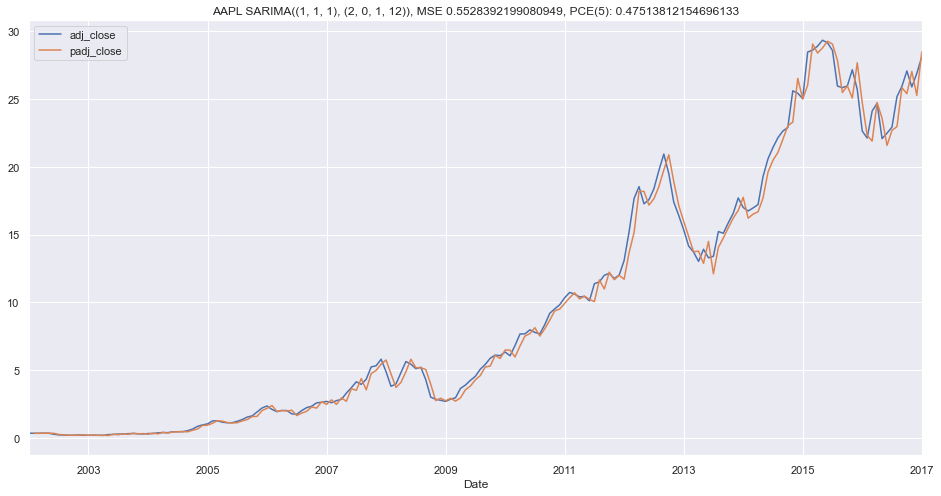

In [22]:
tmdf["padj_close"] = best_mdl.predict(start=1, end=len(mdf))

th=5
pce = percentage_change(tmdf.padj_close, mdf.adj_close, threshold=5)
mse = mean_squared(tmdf.padj_close, mdf.adj_close)


tmdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date", title=f"AAPL SARIMA({best_order}, {best_sorder}), MSE {mse}, PCE({th}): {pce}")



### Modeling with Train/Test

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

order = (1, 1, 1)
sorder = (0, 1, 0, 2)

best_aic = np.inf
best_mdl = None
ms=[24]
best_order = None
best_sorder = None

for P in range(3):
    for Q in range(3):
        for D in range(3):
            for m in ms:
                try:
#                     order = (p, d, q)
                    sorder = (P, D, Q, m)
                    # define a model
                    smodel = SARIMAX(train.adj_close, order=order, seasonal_order=sorder)
                    smodel = smodel.fit()
                    print(f"Order: {order}, Sorder: {sorder}, AIC: {smodel.aic}")
                    if smodel.aic<best_aic:
                        best_aic = smodel.aic
                        best_mdl = smodel
                        best_order = order
                        best_sorder = sorder
                except Exception as e:
                    print(e)
#                 continue

print(f"Best Order: {best_order} Best SOrder: {best_sorder} AIC: {best_mdl.aic}")

Order: (1, 1, 1), Sorder: (0, 0, 0, 24), AIC: 327.30958539980764
Order: (1, 1, 1), Sorder: (0, 1, 0, 24), AIC: 375.22987203634807
Order: (1, 1, 1), Sorder: (0, 2, 0, 24), AIC: 412.8214651488342
Order: (1, 1, 1), Sorder: (0, 0, 1, 24), AIC: 325.3212925755362
Order: (1, 1, 1), Sorder: (0, 1, 1, 24), AIC: 316.56631684110704
Order: (1, 1, 1), Sorder: (0, 2, 1, 24), AIC: 370.0679603445496
Order: (1, 1, 1), Sorder: (0, 0, 2, 24), AIC: 327.28655606524075
Order: (1, 1, 1), Sorder: (0, 1, 2, 24), AIC: 312.1514055171855
Order: (1, 1, 1), Sorder: (0, 2, 2, 24), AIC: 349.59391365477273
Order: (1, 1, 1), Sorder: (1, 0, 0, 24), AIC: 325.4460535979869
Order: (1, 1, 1), Sorder: (1, 1, 0, 24), AIC: 329.0136964677928
Order: (1, 1, 1), Sorder: (1, 2, 0, 24), AIC: 383.86078833282465
Order: (1, 1, 1), Sorder: (1, 0, 1, 24), AIC: 327.30451893361544
Order: (1, 1, 1), Sorder: (1, 1, 1, 24), AIC: 314.3097851531369
Order: (1, 1, 1), Sorder: (1, 2, 1, 24), AIC: 353.97606286053707
Order: (1, 1, 1), Sorder: (1, 0,

Best Order: (1, 1, 1) Best SOrder: (0, 1, 2, 24) AIC: 312.1514055171855


<AxesSubplot:title={'center':'AAPL SARIMA((1, 1, 1), (0, 1, 2, 24)), Train MSE 0.3771446667408898, PCE(5): 0.46408839779005523'}, xlabel='Date'>

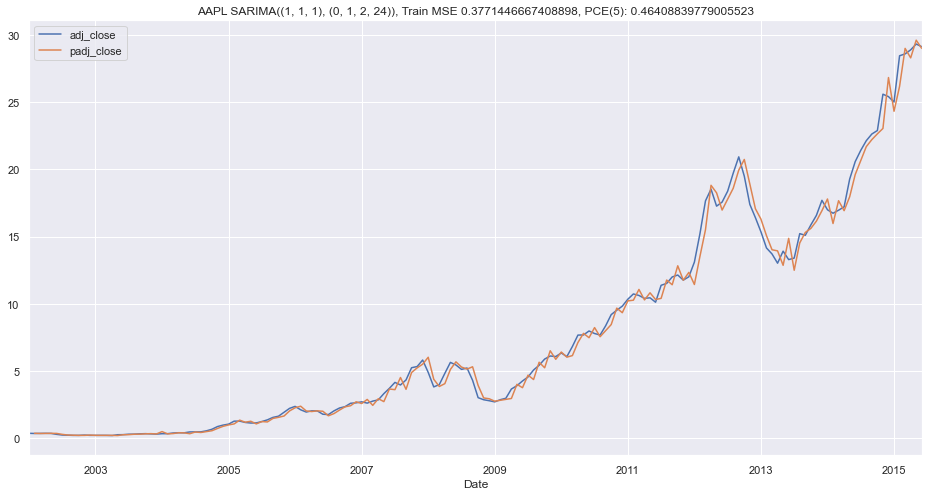

In [24]:
print(f"Best Order: {best_order} Best SOrder: {best_sorder} AIC: {best_mdl.aic}")
tmdf = train.copy()
tmdf["padj_close"] = best_mdl.predict(start=1, end=len(mdf))

th=5
pce = percentage_change(tmdf.padj_close, mdf.adj_close, threshold=5)
mse = mean_squared(tmdf.padj_close, mdf.adj_close)


tmdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date", 
           title=f"AAPL SARIMA({best_order}, {best_sorder}), Train MSE {mse}, PCE({th}): {pce}")



<AxesSubplot:title={'center':'AAPL SARIMA((1, 1, 1), (0, 1, 2, 24)), Test MSE 61.960672171158734, PCE(5): 0.0'}, xlabel='Date'>

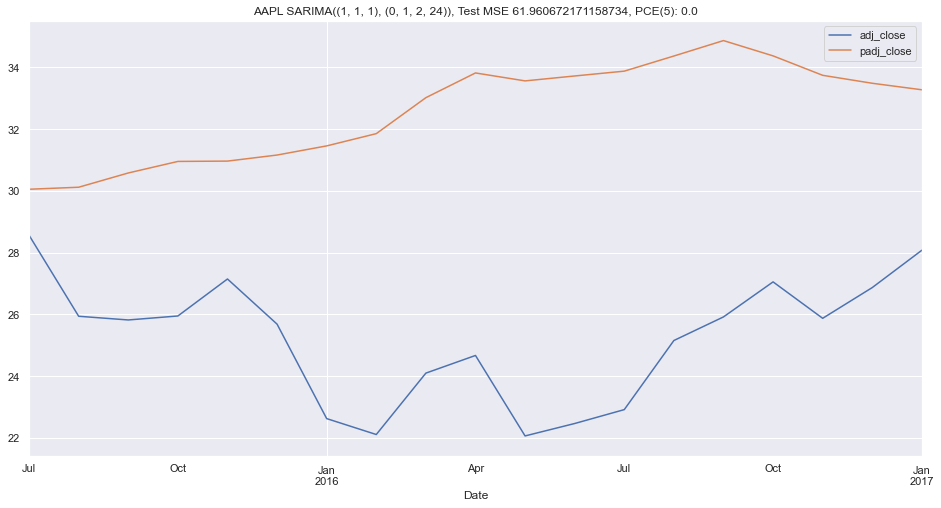

In [25]:
tstdf = test.copy()
tstdf["padj_close"] = best_mdl.forecast(len(test))

th=5
pce = percentage_change(tstdf.padj_close, tstdf.adj_close, threshold=5)
mse = mean_squared(tstdf.padj_close, tstdf.adj_close)


tstdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date", 
            title=f"AAPL SARIMA({best_order}, {best_sorder}), Test MSE {mse}, PCE({th}): {pce}")



## Modeling: Weekly Prediction
Repeating above process to find orders in SARIMA.

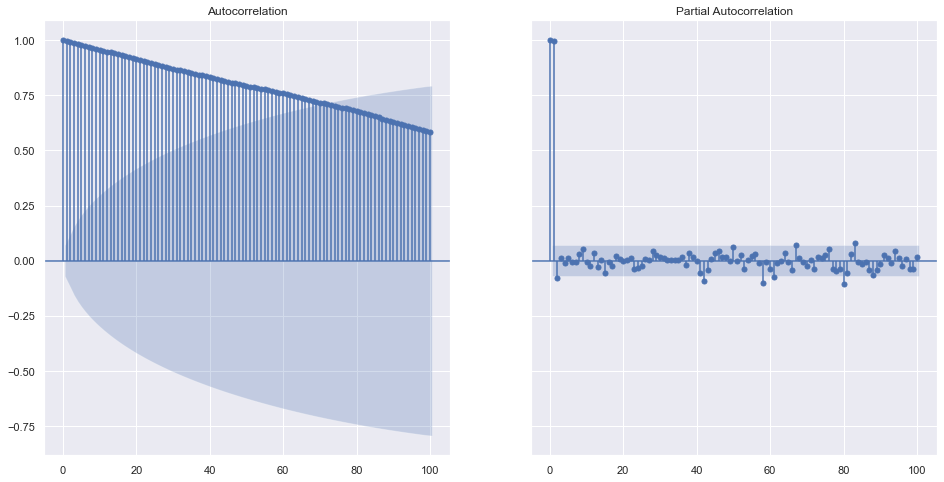

In [26]:
wdf = ndf.groupby(pd.Grouper(key="Date", freq="1W")).adj_close.mean().reset_index()


# taking monthly data
fig, ax = plt.subplots(1,2, sharey=True)
plot_acf(wdf.adj_close, lags=100, ax=ax[0])
plot_pacf(wdf.adj_close, lags=100, ax=ax[1])
plt.show()



In [27]:
adf(wdf.adj_close.diff().dropna())

ADF Statistic: -4.947401222655921
p-value: 2.817541520916075e-05
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is not a random walk.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

train, test = train_test_split(wdf, test_size=0.1, shuffle=False)

order = (1, 1, 1)
sorder = (0, 1, 0, 2)

best_aic = np.inf
best_mdl = None
ms=[26,52]
best_order = None
best_sorder = None

for P in range(3):
    for Q in range(3):
        for D in range(3):
            for m in ms:
                try:
#                     order = (p, d, q)
                    sorder = (P, D, Q, m)
                    # define a model
                    smodel = SARIMAX(train.adj_close, order=order, seasonal_order=sorder)
                    smodel = smodel.fit()
                    print(f"Order: {order}, Sorder: {sorder}, AIC: {smodel.aic}")
                    if smodel.aic<best_aic:
                        best_aic = smodel.aic
                        best_mdl = smodel
                        best_order = order
                        best_sorder = sorder
                except Exception as e:
                    print(e)
#                 continue

print(f"Best Order: {best_order} Best SOrder: {best_sorder} AIC: {best_mdl.aic}")

In [ ]:
tstdf = test.copy()
tstdf["padj_close"] = best_mdl.forecast(len(test))

th=5
pce = percentage_change(tstdf.padj_close, tstdf.adj_close, threshold=5)
mse = mean_squared(tstdf.padj_close, tstdf.adj_close)


tstdf.iplot(kind="line", y=["adj_close", "padj_close"], x="Date", 
            title=f"AAPL SARIMA({best_order}, {best_sorder}), Test MSE {mse}, PCE({th}): {pce}")



## Train as 2002-Feb-1 to 2017-Jan-31 and Test as Feb 1 2017 until Jan 31 2018

In [28]:
symbols = ["AAPL"]

train = yf.download(tickers=symbols,start="2002-02-01", end="2017-01-31")
train.columns = [c.lower() for c in train.columns]
train.rename(columns={"adj close":"adj_close"},inplace=True)
train = train.reset_index()
train.head()

[*********************100%***********************]  1 of 1 completed


,Date,open,high,low,close,adj_close,volume
0,2002-01-31,0.431429,0.441607,0.430536,0.441429,0.377984,468445600
1,2002-02-01,0.434643,0.445714,0.434643,0.435893,0.373244,398305600
2,2002-02-04,0.434286,0.455714,0.432143,0.452679,0.387617,522373600
3,2002-02-05,0.448036,0.463929,0.447857,0.454464,0.389146,456887200
4,2002-02-06,0.457143,0.463929,0.431250,0.440536,0.377220,597576000


In [29]:
test = yf.download(tickers=symbols,start="2017-02-01", end="2018-01-31")
test.columns = [c.lower() for c in test.columns]
test.rename(columns={"adj close":"adj_close"},inplace=True)
test=test.reset_index()
test.head()

[*********************100%***********************]  1 of 1 completed


,Date,open,high,low,close,adj_close,volume
0,2017-01-31,30.287500,30.347500,30.155001,30.337500,28.519798,196804000
1,2017-02-01,31.757500,32.622501,31.752501,32.187500,30.258957,447940000
2,2017-02-02,31.995001,32.347500,31.945000,32.132500,30.207254,134841600
3,2017-02-03,32.077499,32.297501,32.040001,32.270000,30.336514,98029200
4,2017-02-06,32.282501,32.625000,32.224998,32.572498,30.620886,107383600


In [30]:
order = (3,1,0)
sorder = (2,1,0,12)


smodel = SARIMAX(train.adj_close, order=order, seasonal_order=sorder)
smodel = smodel.fit()

tstdf = test.copy()
tstdf["padj_close"] = smodel.forecast(len(test)).values
mean_squared(tstdf.padj_close, tstdf.adj_close)

3.4426067973743

<AxesSubplot:title={'center':'AAPL SARIMA((3, 1, 0), (2, 1, 0, 12)), Train MSE 0.059221824707711306, PCE(5): 0.9446504237288136'}, xlabel='Date'>

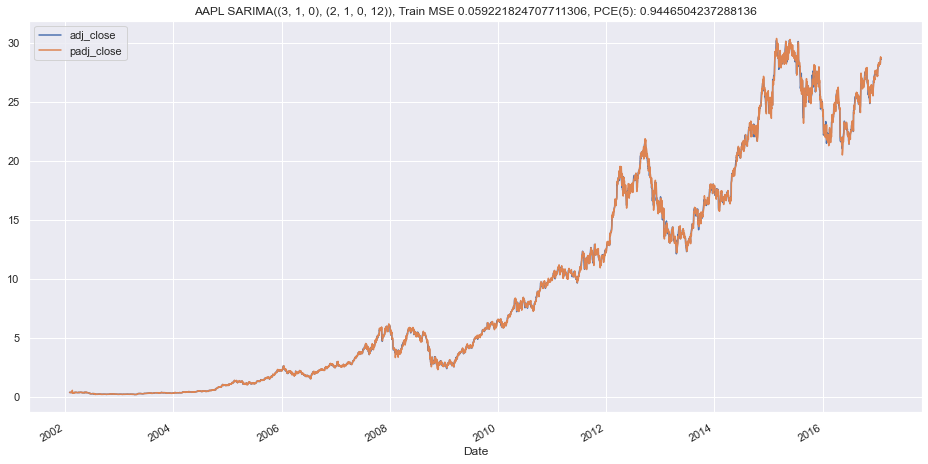

In [31]:

tmdf = train.copy()
tmdf["padj_close"] = smodel.predict(start=1, end=len(train))

th=5
pce = percentage_change(tmdf.padj_close, train.adj_close, threshold=5)
mse = mean_squared(tmdf.padj_close, train.adj_close)


tmdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date", 
           title=f"AAPL SARIMA({order}, {sorder}), Train MSE {mse}, PCE({th}): {pce}")



<AxesSubplot:title={'center':'AAPL SARIMA((3, 1, 0), (2, 1, 0, 12)), Test MSE 3.4426067973743, PCE(5): 0.5833333333333334'}, xlabel='Date'>

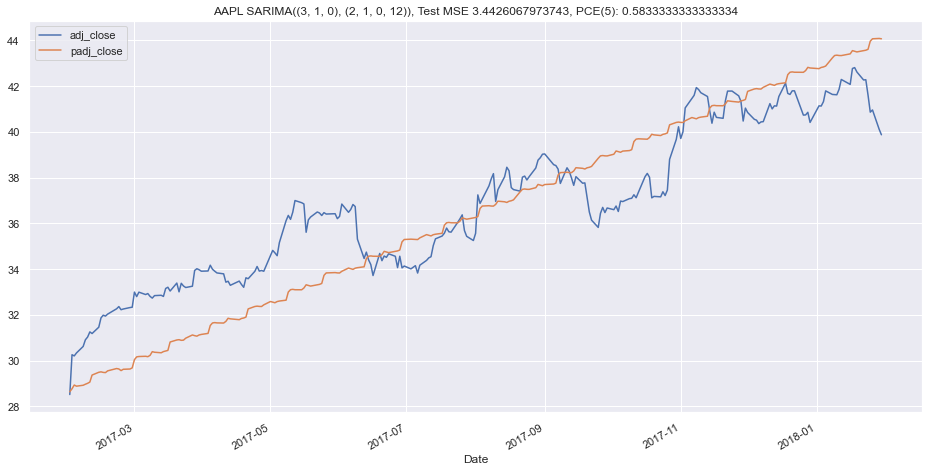

In [32]:
tstdf = test.copy()
tstdf["padj_close"] = smodel.forecast(len(test)).values

th=5
pce = percentage_change(tstdf.padj_close, tstdf.adj_close, threshold=5)
mse = mean_squared(tstdf.padj_close, tstdf.adj_close)


tstdf.plot(kind="line", y=["adj_close", "padj_close"], x="Date", 
            title=f"AAPL SARIMA({order}, {sorder}), Test MSE {mse}, PCE({th}): {pce}")



### Auto ARIMA
We will use Auto SARIMA.

In [33]:
import pmdarima as pm

In [34]:
model=pm.auto_arima(train.adj_close, start_p=1, start_q=1,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=True,stationary=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, maxiter=10) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1611.114, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=437.023, Time=1.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1610.950, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=72.828, Time=3.03 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-593.048, Time=4.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-627.670, Time=1.83 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.11 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=9.19 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=8.92 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=12.90 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.25 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-640.511, Time=3.4

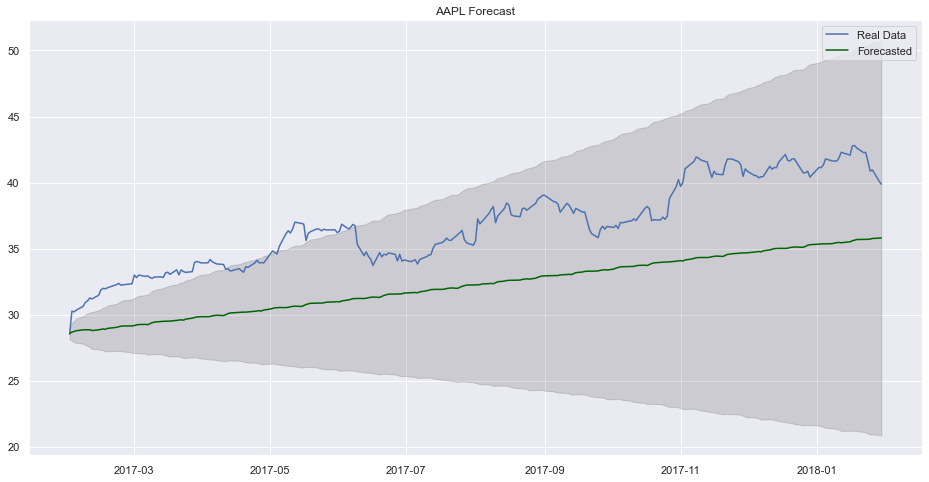

In [35]:
# Forecast
n_periods = len(test)
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.Date

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

t = test.adj_close
t.index = index_of_fc
# Plot
plt.plot(t)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(["Real Data", "Forecasted"])

plt.title("AAPL Forecast")
plt.show()

In [36]:
mean_squared(t,fc_series)

22.623702696312897